In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('E:/Vaibhav/Study_CS/IIT PG/Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [5]:
df.shape

(515738, 17)

In [6]:
# Combine the positive and negative reviews into a single DataFrame
df_positive = df[['Positive_Review']].copy()
df_positive['Sentiment'] = 1
df_positive.rename(columns={'Positive_Review': 'Review'}, inplace=True)

df_negative = df[['Negative_Review']].copy()
df_negative['Sentiment'] = 0
df_negative.rename(columns={'Negative_Review': 'Review'}, inplace=True)

In [7]:
# Concatenate the positive and negative reviews into a single DataFrame
df_reviews = pd.concat([df_positive, df_negative], axis=0).reset_index(drop=True)
df_reviews

,Review,Sentiment
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1
...,...,...
1031471,no trolly or staff to help you take the lugga...,0
1031472,The hotel looks like 3 but surely not 4,0
1031473,The ac was useless It was a hot week in vienn...,0
1031474,No Negative,0


In [8]:
# Remove rows with empty reviews
df_reviews = df_reviews[df_reviews['Review'].str.strip().astype(bool)]


In [9]:
# Preprocess the text
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [10]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stopwords, and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

In [11]:
# Apply preprocessing
df_reviews['Processed_Review'] = df_reviews['Review'].apply(preprocess_text)

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_21892\3121336701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['Processed_Review'] = df_reviews['Review'].apply(preprocess_text)


In [12]:
# Sample a fraction of the data (e.g., 10%)
df_sampled = df_reviews.sample(frac=0.1, random_state=42)

In [13]:
# Create TF-IDF features with a smaller number of features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_sampled['Processed_Review'])

In [14]:
# Extract the target variable
y = df_sampled['Sentiment'].values

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [18]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_rep)

Accuracy: 92.68%
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10329
           1       0.93      0.92      0.93     10280

    accuracy                           0.93     20609
   macro avg       0.93      0.93      0.93     20609
weighted avg       0.93      0.93      0.93     20609



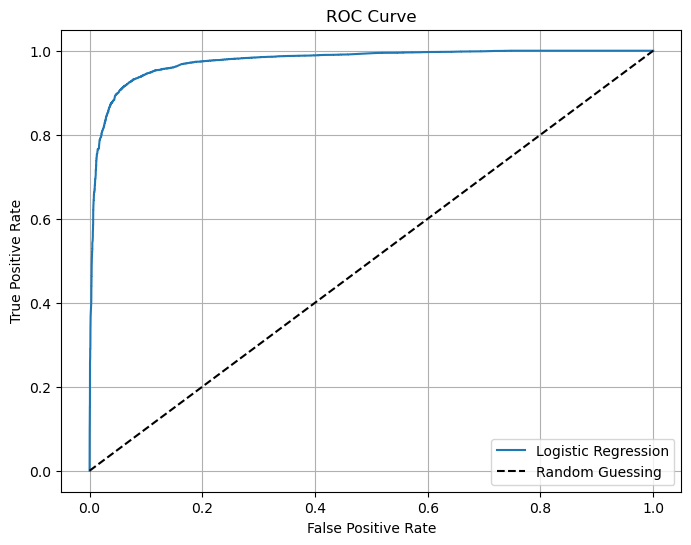

In [19]:
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [20]:
# Word Count Visualization
from collections import Counter

In [21]:
# Combine all processed reviews into a single string
all_reviews = ' '.join(df_sampled['Processed_Review'])
words = word_tokenize(all_reviews)
word_counts = Counter(words)

In [22]:
# Plot the most common words
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

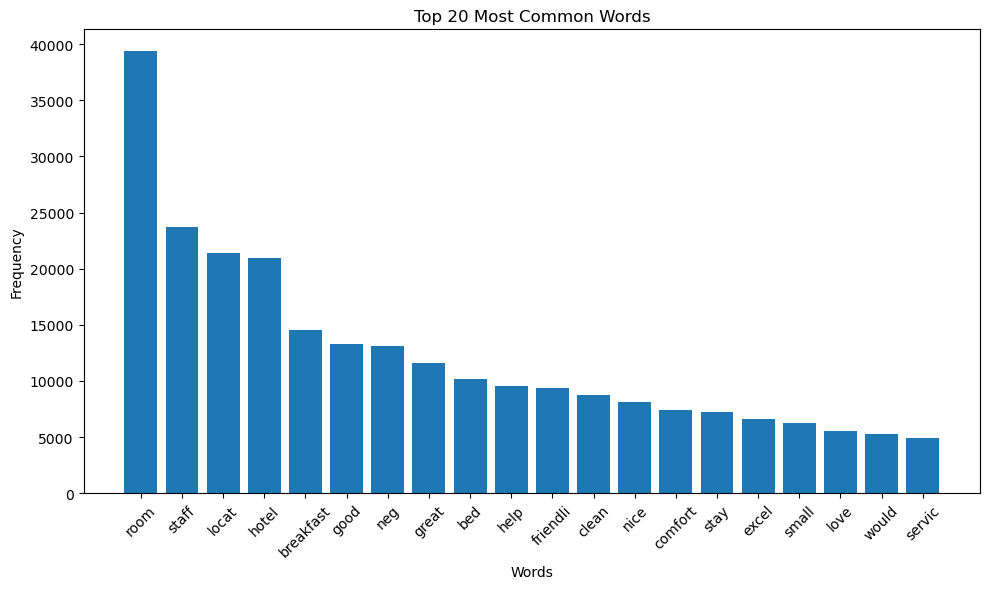

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Function to predict sentiment
def predict_sentiment(review):
    processed_review = preprocess_text(review)
    review_tfidf = vectorizer.transform([processed_review])
    prediction = model.predict(review_tfidf)
    return 'positive' if prediction[0] == 1 else 'negative'

In [26]:
# Take user input for a review
user_review = input("Enter a hotel review: ")
predicted_sentiment = predict_sentiment(user_review)
print(f'Review: "{user_review}"\nPredicted Sentiment: {predicted_sentiment}')

Enter a hotel review:  amazing hotel staff and good food 


Review: "amazing hotel staff and good food "
Predicted Sentiment: positive
